In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [18]:
traindf.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [19]:
testdf.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [20]:
# handling missing values in the dataset
traindf.isna().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

<Axes: >

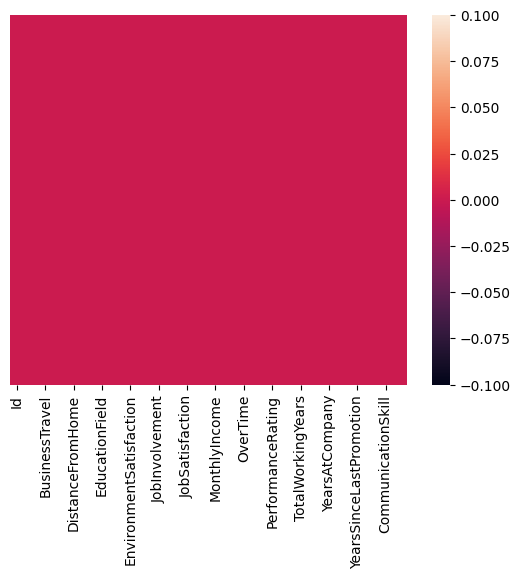

In [21]:
sns.heatmap(testdf.isnull(), yticklabels = False)

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming traindf is your DataFrame
for column in traindf.columns:
    if pd.api.types.is_numeric_dtype(traindf[column]):
        continue
    traindf[column] = LabelEncoder().fit_transform(traindf[column])

# Example DataFrame
print(traindf)


        Id  Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0        1   30          0               0           1                 2   
1        2   36          0               2           1                12   
2        3   55          1               2           2                 2   
3        4   39          0               2           1                24   
4        5   37          0               2           1                 3   
...    ...  ...        ...             ...         ...               ...   
1623  1624   42          1               1           1                19   
1624  1625   55          1               2           2                 2   
1625  1626   25          1               2           2                 9   
1626  1627   29          1               2           0                13   
1627  1628   29          1               2           1                18   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0     

In [23]:
cols = ['Id', 'EmployeeNumber', 'Behaviour']

traindf.drop(columns=cols, inplace=True)
testdf.drop(columns = cols, inplace = True)

<Axes: >

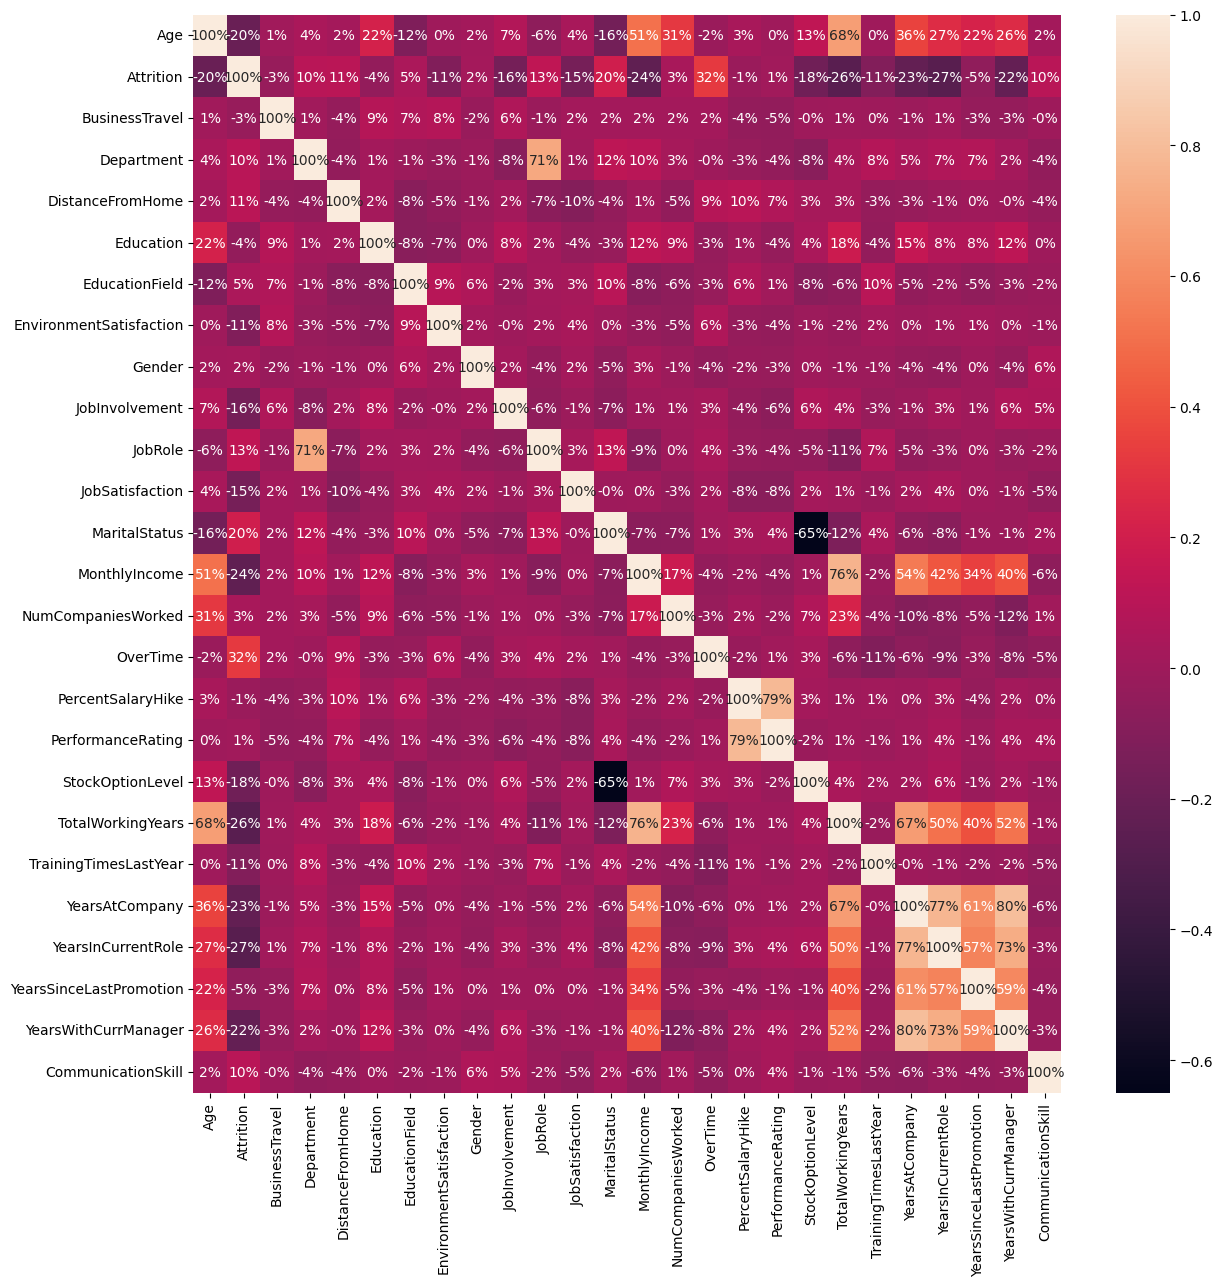

In [14]:
plt.figure(figsize=(14,14))
sns.heatmap(traindf.corr(), annot=True, fmt='.0%')

In [13]:
# Split dataset into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(traindf.drop('Attrition', axis=1),
                                                   traindf['Attrition'], test_size = 0.30)

In [12]:
# Import sklearn and create an object of ml algorithm

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=79)

In [11]:
#  fit and predict / training and testing 

model.fit(X_train, y_train)  #train model
preds = model.predict(X_test)        #testing model

In [10]:
# Calculating accuracy of the model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
accuracy

0.9631901840490797

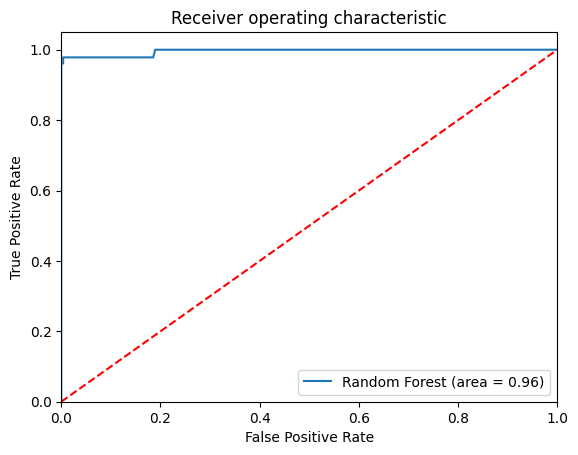

In [9]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [8]:
# Calculating probability 

train_prob = model.predict_proba(X_test)[:, 1]
train_prob

array([0.944, 0.952, 0.908, 0.164, 0.936, 0.98 , 0.368, 0.124, 0.228,
       0.144, 0.988, 0.768, 0.22 , 0.132, 0.992, 0.12 , 0.868, 0.972,
       0.108, 0.096, 0.18 , 0.284, 0.992, 0.94 , 0.94 , 0.98 , 0.952,
       0.94 , 0.952, 0.964, 0.096, 0.444, 0.976, 0.268, 0.992, 0.976,
       0.928, 0.928, 0.992, 0.212, 0.992, 0.224, 0.072, 0.968, 0.96 ,
       0.992, 0.976, 0.972, 0.372, 0.952, 0.176, 0.228, 0.136, 0.828,
       0.116, 0.324, 0.928, 0.928, 0.976, 0.996, 0.256, 0.188, 0.492,
       0.136, 0.024, 0.296, 0.232, 0.272, 0.964, 0.196, 0.22 , 0.976,
       0.024, 0.096, 0.428, 0.972, 0.98 , 0.924, 0.164, 0.328, 0.068,
       0.032, 0.98 , 0.096, 0.2  , 0.94 , 0.152, 0.172, 0.964, 0.988,
       0.924, 0.116, 0.964, 0.968, 0.988, 0.156, 0.024, 0.3  , 0.98 ,
       0.128, 0.96 , 0.98 , 0.08 , 0.348, 0.984, 0.992, 0.976, 0.992,
       0.996, 0.264, 0.124, 0.332, 0.132, 0.424, 0.988, 0.944, 0.132,
       0.484, 0.232, 0.156, 0.144, 0.144, 0.068, 0.28 , 0.992, 0.256,
       0.344, 0.056,

In [7]:
test_preds = model.predict(testdf)
print(test_preds)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0]


In [4]:
test_acc = accuracy_score(y_test[:-19], test_preds)
test_acc

0.5361702127659574

In [5]:
test_prob = model.predict_proba(testdf)[:, 1]
test_prob

array([0.124, 0.1  , 0.156, 0.16 , 0.084, 0.168, 0.62 , 0.24 , 0.308,
       0.092, 0.108, 0.224, 0.22 , 0.084, 0.108, 0.136, 0.432, 0.176,
       0.188, 0.016, 0.096, 0.648, 0.136, 0.124, 0.192, 0.052, 0.096,
       0.06 , 0.868, 0.112, 0.072, 0.208, 0.376, 0.376, 0.052, 0.124,
       0.144, 0.268, 0.252, 0.228, 0.708, 0.276, 0.096, 0.172, 0.124,
       0.144, 0.232, 0.228, 0.056, 0.296, 0.608, 0.148, 0.264, 0.464,
       0.368, 0.268, 0.084, 0.62 , 0.056, 0.268, 0.144, 0.124, 0.372,
       0.04 , 0.224, 0.188, 0.092, 0.136, 0.172, 0.148, 0.408, 0.084,
       0.176, 0.3  , 0.34 , 0.416, 0.096, 0.224, 0.1  , 0.608, 0.12 ,
       0.348, 0.24 , 0.052, 0.344, 0.164, 0.224, 0.288, 0.224, 0.396,
       0.388, 0.14 , 0.508, 0.196, 0.724, 0.464, 0.32 , 0.136, 0.116,
       0.052, 0.28 , 0.14 , 0.148, 0.124, 0.22 , 0.264, 0.116, 0.144,
       0.124, 0.152, 0.224, 0.276, 0.224, 0.14 , 0.252, 0.072, 0.06 ,
       0.184, 0.216, 0.152, 0.644, 0.296, 0.092, 0.412, 0.396, 0.096,
       0.032, 0.384,

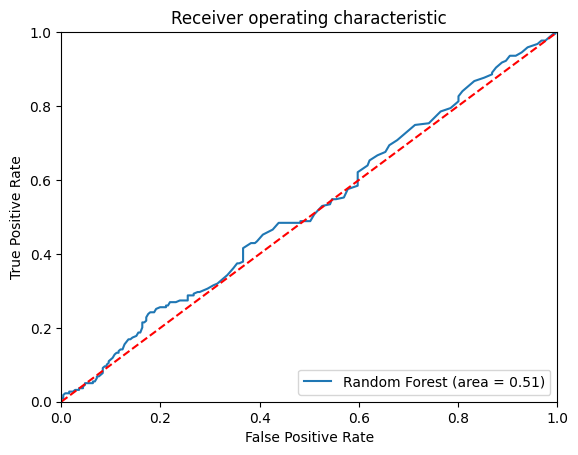

In [6]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

rf_roc_auc = roc_auc_score(y_test[:-19], model.predict(testdf))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test[:-19], model.predict_proba(testdf)[:,1])
plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()